# An illustration of various embeddings on the UCI digits dataset.

 UMAP and t-SNE do not use label information. 
 t-SNE will be initialized with the embedding that is generated by PCA in this example, which is not the default setting.It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

Linear Discriminant Analysis, from the sklearn.discriminant_analysis module, and Neighborhood Components Analysis,
from the sklearn.neighbors module, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.

In [1]:
figdir = "figures"
import os
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection, neighbors
try:
    import umap  # # https://github.com/lmcinnes/umap
except ModuleNotFoundError:
    %pip install -qq umap-learn
    import umap  # # https://github.com/lmcinnes/umap

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
digits = datasets.load_digits()  # n_class=6)
X = digits.data
y = digits.target  # 0..9
n_samples, n_features = X.shape
n_neighbors = 30

In [3]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        # color=y[i] / 10.0
        color = (y[i] + 1) / 11.0  # ensure each digit gets unique color
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(color), fontdict={"weight": "bold", "size": 9})

    if hasattr(offsetbox, "AnnotationBbox"):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.0, 1.0]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

([], [])

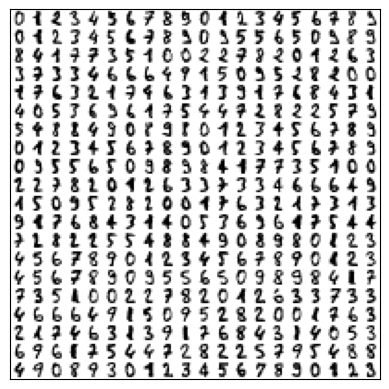

In [4]:
# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix : ix + 8, iy : iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')
##plt.savefig("manifold_digits_data.pdf")

Computing UMAP projection


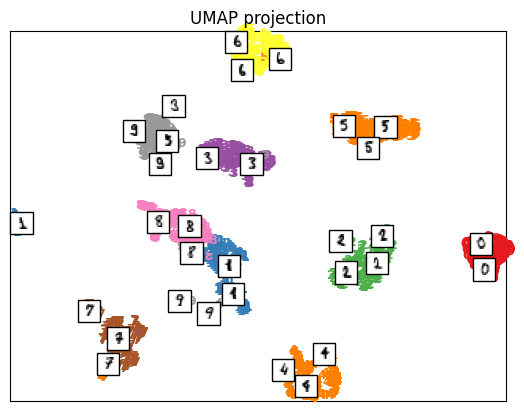

In [5]:
print("Computing UMAP projection")
X_umap = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric="correlation").fit_transform(X)
plot_embedding(X_umap, "UMAP projection")
#plt.savefig("manifold_digits_umap.pdf")
plt.show()

Computing PCA projection


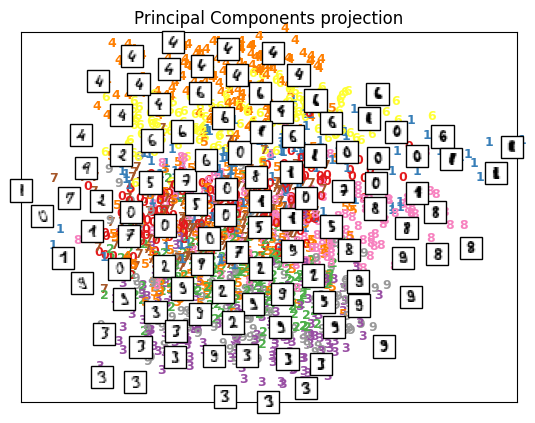

In [6]:
# Projection on to the first 2 principal components

print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, "Principal Components projection")
#plt.savefig("manifold_digits_pca.pdf")
plt.show()

Computing Linear Discriminant Analysis projection


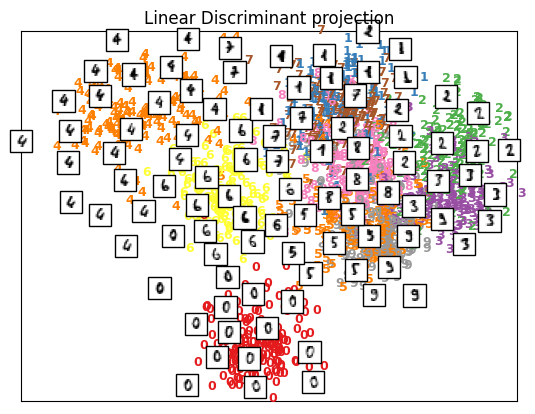

In [7]:
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda, "Linear Discriminant projection")
#plt.savefig("manifold_digits_lda.pdf")
plt.show()


Computing MDS embedding


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Done. Stress: 464415648.022020


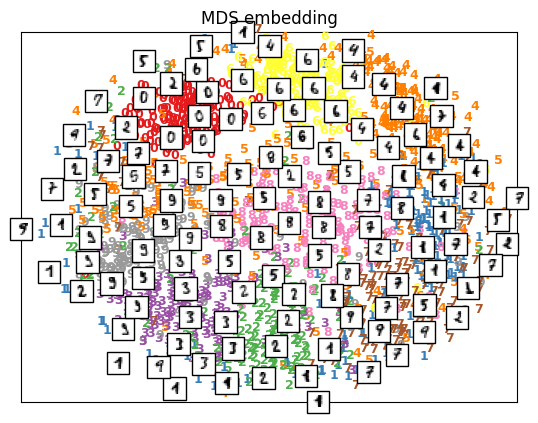

In [8]:
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, "MDS embedding")
#plt.savefig("manifold_digits_mds.pdf")
plt.show()

Computing t-SNE embedding


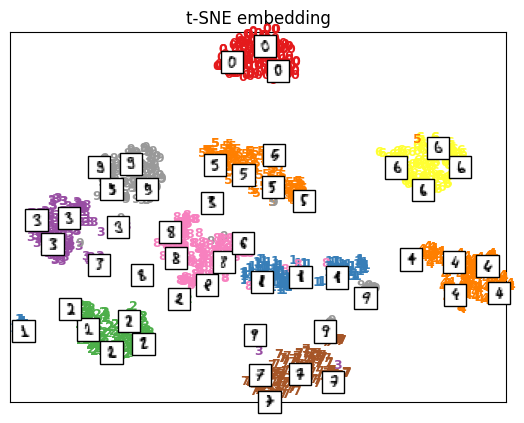

In [9]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding")
#plt.savefig("manifold_digits_tsne.pdf")
plt.show()

Computing Spectral embedding


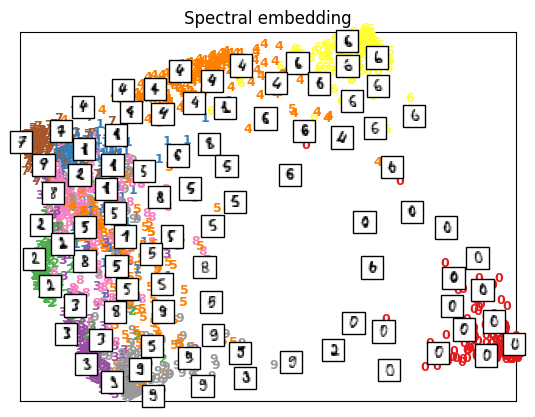

In [10]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
X_se = embedder.fit_transform(X)
plot_embedding(X_se, "Spectral embedding")
#plt.savefig("manifold_digits_SE.pdf")
plt.show()

Computing LLE embedding


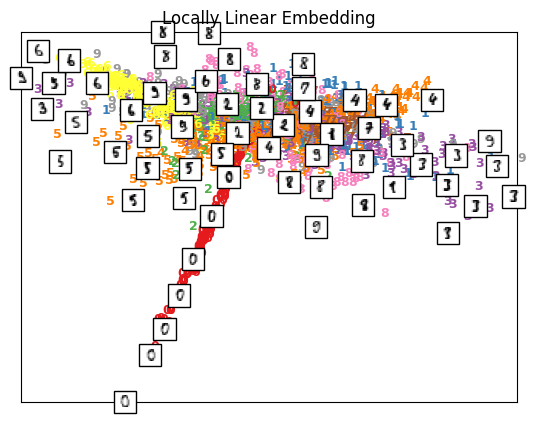

In [11]:
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
embedder = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="standard")
X_lle = embedder.fit_transform(X)
plot_embedding(X_lle, "Locally Linear Embedding")
#plt.savefig("manifold_digits_LLE.pdf")
plt.show()

Computing Isomap projection


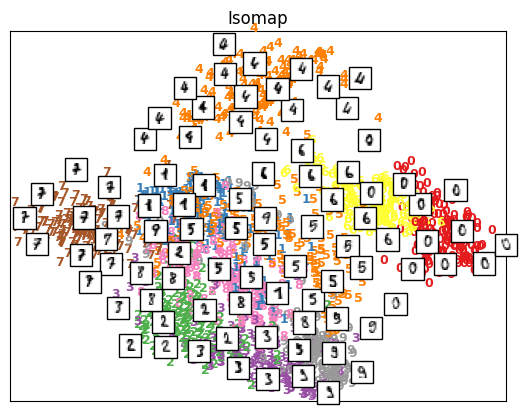

In [12]:
# Isomap projection of the digits dataset
print("Computing Isomap projection")
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, "Isomap")
#plt.savefig("manifold_digits_isomap.pdf")
plt.show()

Computing kPCA


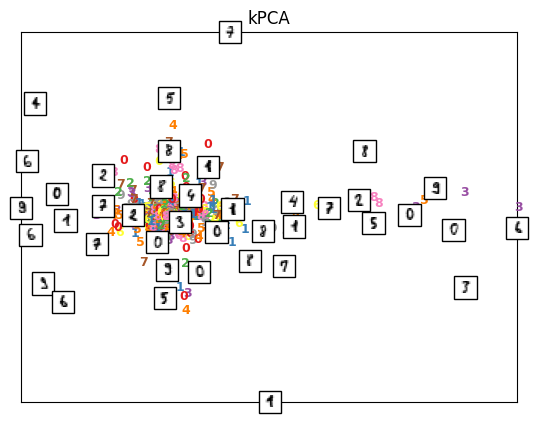

In [13]:
from sklearn.decomposition import KernelPCA

print("Computing kPCA")
transformer = KernelPCA(n_components=2, kernel="rbf", gamma=10)
X_kpca = transformer.fit_transform(X)
plot_embedding(X_kpca, "kPCA")
#plt.savefig("manifold_digits_kPCA.pdf")
plt.show()